# **i. Introduction**

==============================================================

Milestone 1


Nama  : Anis Marsela

Batch : RMT-043


Project ini dibuat untuk menganalisis data pemesanan hotel dengan tujuan memahami faktor-faktor yang mempengaruhi pembatalan reservasi.  
Proses diawali dengan eksplorasi dan pembersihan data, dilanjutkan analisis statistik dan visualisasi untuk menggali insight bisnis.  
Output akhir berupa dashboard interaktif yang dapat membantu pemangku kepentingan dalam pengambilan keputusan dan mitigasi risiko pembatalan.


=============================================================

# **ii. Problem Statement and Dataset Description**

### **Latar Belakang**

Di era digital saat ini, proses pemesanan hotel menjadi sangat mudah. Cukup membuka aplikasi, beberapa klik, dan reservasi pun selesai. Namun, kemudahan ini justru menghadirkan tantangan baru bagi pihak hotel: tingginya tingkat pembatalan reservasi oleh pelanggan.

Masalah pembatalan bukan hanya sekadar kamar kosong yang tak terisi, tetapi juga berkaitan dengan kerugian waktu, tenaga, serta potensi pendapatan yang hilang. Dataset Hotel Booking Demand menyimpan data historis pemesanan dari dua tipe hotel: City Hotel dan Resort Hotel, dilengkapi dengan informasi seperti tanggal booking, asal tamu, lama menginap, hingga status pembatalannya.

Melalui eksplorasi dataset ini, kita dapat mencari pola-pola yang sering muncul pada kasus pembatalan. Tujuannya adalah membantu pihak hotel memahami karakteristik pemesanan yang rawan dibatalkan sehingga mereka dapat membuat strategi mitigasi risiko yang lebih baik.


### **SMART** 

**Specific**: Banyak tamu melakukan pembatalan reservasi hotel, yang menyebabkan kerugian pendapatan dan inefisiensi operasional bagi manajemen hotel.

**Measurable**: Saya ingin mengidentifikasi faktor-faktor utama yang berkontribusi terhadap pembatalan reservasi, seperti tipe hotel, lama menginap, asal negara, metode pemesanan, dan status pembayaran.

**Achievable**: Analisis ini dilakukan menggunakan dataset Hotel Booking Demand dari Kaggle, dengan teknik eksplorasi data serta analisis statistik deskriptif dan inferensial.

**Relevant**: Analisis ini membantu hotel mengurangi tingkat pembatalan dan menyusun strategi pemasaran atau kebijakan refund yang lebih baik.

**Time-bound**: Proyek ini diselesaikan dalam waktu 1 minggu, termasuk analisis, visualisasi, dan dashboard Tableau.

### **Problem Statement**

Dalam waktu 1 minggu, saya akan menganalisis data pemesanan hotel dari Kaggle untuk mengidentifikasi faktor-faktor utama yang memengaruhi pembatalan reservasi, menggunakan analisis statistik dan visualisasi data. Hasil dari analisis ini diharapkan dapat memberikan insight yang bermanfaat bagi manajemen hotel dalam mengurangi risiko pembatalan secara signifikan.

### **Penjabaran Masalah (5W1H)**


* **What**: Faktor apa saja yang paling sering muncul dalam kasus pembatalan reservasi?
* **Why**: Mengapa pelanggan membatalkan reservasi? Apakah karena waktu tunggu (lead time) yang terlalu panjang atau perubahan harga?
* **Who**: Siapa yang paling sering membatalkan? Apakah berdasarkan asal negara, jenis pelanggan, atau metode reservasi?
* **When**: Bulan atau waktu kapan saja pembatalan paling sering kejadian?
* **Where**: Jenis hotel mana yang lebih sering mengalami pembatalan? City Hotel atau Resort Hotel?
* **How**: Bagaimana cara membangun sistem yang mampu mendeteksi potensi pembatalan lebih awal?



### **Dataset Description**

Dataset yang digunakan berjudul "Hotel Booking Demand Dataset" yang tersedia di [Kaggle](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand). Dataset ini berisi lebih dari 119.000 entri pemesanan hotel dengan 32 kolom yang mencakup informasi tentang jenis hotel, waktu pemesanan, karakteristik pelanggan, status reservasi, dan lain-lain.

* Jumlah baris: 119.390
* Jumlah kolom: 32
* Tipe data: kombinasi antara numerik, kategorikal, dan tanggal
* Target analisis: kolom is_canceled (1 = dibatalkan, 0 = tidak dibatalkan)


# **iii. Data Loading**

## **1. Loading Data**

Langkah pertama dalam analisis ini adalah memuat dataset ke dalam Notebook python menggunakan library pandas. Dataset yang digunakan berformat .csv yang diunduh dari kaggle.

In [325]:
# import libray
import pandas as pd

# Memuat data dari file CSV
df = pd.read_csv('hotel_bookings.csv')

# Menampilkan 5 baris pertama 
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Setelah data dimuat, terlihat sekilas isi dataset dengan fungsi .head() ini membantu untuk memahami strutur awal data seperti nama kolom, jenis nilai, serta memerika apakah proses loading berhasil

## **2. Summary Data**

Selanjutnya kita mencoba untuk melihat daftar nama kolom dan tipe datanya

In [326]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Fungsi .info() akan menunjukkan tipe data setiap kolom, jumlah non-null values dan informasi awal tentang missing values.

# **IV. Data Cleaning**

## **1. Cek Missing Value**

Langkah pertama dalam data cleaning adalah mencari tahu apakah ada data yang hilang (missing values) di dalam dataset.

In [327]:
# cek jumlah missing values per kolom
# df.isnull().sum()

# cek jumlah data yang hilang (missing values) per kolom
jumlah_data_hilang = df.isnull().sum()
persentase_data_hilang = (jumlah_data_hilang / len(df)) * 100

# Buat tabel ringkasan data yang hilang
data_hilang = pd.DataFrame({
    'jumlah_data_hilang': jumlah_data_hilang,
    'persentase_data_hilang': persentase_data_hilang
}).sort_values(by='persentase_data_hilang', ascending=False)

data_hilang


,jumlah_data_hilang,persentase_data_hilang
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350
reserved_room_type,0,0.000000
assigned_room_type,0,0.000000
booking_changes,0,0.000000
deposit_type,0,0.000000
hotel,0,0.000000
previous_cancellations,0,0.000000


Di sini saya menyusun tabel per kolom untuk menghitung persentase data yang hilang, kemudian mengurutkannya dari yang paling banyak. Terlihat bahwa kolom company memiliki data hilang sebesar 94%, kemudian agent sebesar 13%, lalu country dan children dengan persentase yang lebih kecil.

## **2. Drop kolom yang tidak relevan**

Hal-hal yang dilakukan disini :

* kolom company punya missing values 94%, maka kolom dihapus
* reservation_status_data dihapus karena sudah ada informasi lain dari kolom tanggal lain
* kolom-kolom arrival_date_year, arrival_date_month, arrival_date_day_of_month akan digabung menjadi 1 kolom baru yatiu arrival_date

In [328]:
# Buat mapping nama bulan ke angka
bulan_map = {
    'January': '01', 'February': '02', 'March': '03',
    'April': '04', 'May': '05', 'June': '06',
    'July': '07', 'August': '08', 'September': '09',
    'October': '10', 'November': '11', 'December': '12'
}

# Ubah nama bulan ke angka
df['arrival_date_month_num'] = df['arrival_date_month'].map(bulan_map)

# Gabungkan kolom tahun, bulan (dalam angka), dan hari
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month_num'] + '-' +
    df['arrival_date_day_of_month'].astype(str),
    errors='coerce'
)

# Drop kolom-kolom yang sudah digabung
df.drop(columns=[
    'reservation_status',
    'arrival_date_week_number',
    'agent',
    'assigned_room_type',
    'days_in_waiting_list',
    'babies',
    'previous_bookings_not_canceled',
     'required_car_parking_spaces',
    'arrival_date_year',
    'arrival_date_month',
    'arrival_date_day_of_month',
    'arrival_date_month_num'  
], inplace=True)

# Tampilkan 5 data teratas untuk pengecekan
df.head()


,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,...,previous_cancellations,reserved_room_type,booking_changes,deposit_type,company,customer_type,adr,total_of_special_requests,reservation_status_date,arrival_date
0,Resort Hotel,0,342,0,0,2,0.0,BB,PRT,Direct,...,0,C,3,No Deposit,NaN,Transient,0.0,0,2015-07-01,2015-07-01
1,Resort Hotel,0,737,0,0,2,0.0,BB,PRT,Direct,...,0,C,4,No Deposit,NaN,Transient,0.0,0,2015-07-01,2015-07-01
2,Resort Hotel,0,7,0,1,1,0.0,BB,GBR,Direct,...,0,A,0,No Deposit,NaN,Transient,75.0,0,2015-07-02,2015-07-01
3,Resort Hotel,0,13,0,1,1,0.0,BB,GBR,Corporate,...,0,A,0,No Deposit,NaN,Transient,75.0,0,2015-07-02,2015-07-01
4,Resort Hotel,0,14,0,2,2,0.0,BB,GBR,Online TA,...,0,A,0,No Deposit,NaN,Transient,98.0,1,2015-07-03,2015-07-01


## **3. Isi Missing Value**

Setelah drop kolo, selanjutnya isi missing value:

* kolom agent isi dengan 0
* kolom country isi dengan Unknown
* kolom children isi dengan 0

In [329]:
df['country'].fillna('Unknown', inplace=True)
df['children'].fillna(0, inplace=True)

# cek lagi
df.isnull().sum().sort_values(ascending=False)


C:\Users\USER\AppData\Local\Temp\ipykernel_3848\3409438299.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_3848\3409438299.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

company                      112593
hotel                             0
is_canceled                       0
reservation_status_date           0
total_of_special_requests         0
adr                               0
customer_type                     0
deposit_type                      0
booking_changes                   0
reserved_room_type                0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
lead_time                         0
arrival_date                      0
dtype: int64

Finally data sudah bersih dari missing value

## 4. **Cek dan Atasi Duplikast**

Disini kita cek ada berapa banyak data yang sama atau duplikat

In [330]:
# Cek duplikat
df.duplicated().sum()


33253

Terlihat banyaknya data yang duplikat sehingga saya akan drop data yang duplikat itu

In [331]:
# Hapus duplikat
df.drop_duplicates(inplace=True)


Data berhasil dihapus, setelah kita cek ulang lagi

In [332]:
df.duplicated().sum()


0

Data berhasil dihapus dan duplikatnya 0

## **5. Hasil Akhir**

In [333]:
# cek kolom
df.info()

# cek 5 baris pertama
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 86137 entries, 0 to 119389
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   hotel                      86137 non-null  object        
 1   is_canceled                86137 non-null  int64         
 2   lead_time                  86137 non-null  int64         
 3   stays_in_weekend_nights    86137 non-null  int64         
 4   stays_in_week_nights       86137 non-null  int64         
 5   adults                     86137 non-null  int64         
 6   children                   86137 non-null  float64       
 7   meal                       86137 non-null  object        
 8   country                    86137 non-null  object        
 9   market_segment             86137 non-null  object        
 10  distribution_channel       86137 non-null  object        
 11  is_repeated_guest          86137 non-null  int64         
 12  previous

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,...,previous_cancellations,reserved_room_type,booking_changes,deposit_type,company,customer_type,adr,total_of_special_requests,reservation_status_date,arrival_date
0,Resort Hotel,0,342,0,0,2,0.0,BB,PRT,Direct,...,0,C,3,No Deposit,NaN,Transient,0.0,0,2015-07-01,2015-07-01
1,Resort Hotel,0,737,0,0,2,0.0,BB,PRT,Direct,...,0,C,4,No Deposit,NaN,Transient,0.0,0,2015-07-01,2015-07-01
2,Resort Hotel,0,7,0,1,1,0.0,BB,GBR,Direct,...,0,A,0,No Deposit,NaN,Transient,75.0,0,2015-07-02,2015-07-01
3,Resort Hotel,0,13,0,1,1,0.0,BB,GBR,Corporate,...,0,A,0,No Deposit,NaN,Transient,75.0,0,2015-07-02,2015-07-01
4,Resort Hotel,0,14,0,2,2,0.0,BB,GBR,Online TA,...,0,A,0,No Deposit,NaN,Transient,98.0,1,2015-07-03,2015-07-01


## **6. Simpan Data bersih ke File csv**

In [334]:
df.to_csv(r'C:\Users\USER\Documents\Hacktiv8\Milestone\Milestone 01\p0-ftds043-rmt-m1-AnisMarsela32\data_bersih_hotel_bookings.csv', index=False)


# **v. Exploration dan Analysis**

Bagian ini mencakup analisi statistik, visualisasi data, serta insight dari data hotel booking yang sudah dibersihkan sebelumnya

 <!-- ## **1. Loading data yang sudah bersih** -->

In [335]:
# import library yang dibutuhkan
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

# Memuat data yang sudah bersih
df = pd.read_csv('data_bersih_hotel_bookings.csv')

# Menampilkan 5 baris pertama 
df.head()


,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,...,previous_cancellations,reserved_room_type,booking_changes,deposit_type,company,customer_type,adr,total_of_special_requests,reservation_status_date,arrival_date
0,Resort Hotel,0,342,0,0,2,0.0,BB,PRT,Direct,...,0,C,3,No Deposit,NaN,Transient,0.0,0,2015-07-01,2015-07-01
1,Resort Hotel,0,737,0,0,2,0.0,BB,PRT,Direct,...,0,C,4,No Deposit,NaN,Transient,0.0,0,2015-07-01,2015-07-01
2,Resort Hotel,0,7,0,1,1,0.0,BB,GBR,Direct,...,0,A,0,No Deposit,NaN,Transient,75.0,0,2015-07-02,2015-07-01
3,Resort Hotel,0,13,0,1,1,0.0,BB,GBR,Corporate,...,0,A,0,No Deposit,NaN,Transient,75.0,0,2015-07-02,2015-07-01
4,Resort Hotel,0,14,0,2,2,0.0,BB,GBR,Online TA,...,0,A,0,No Deposit,NaN,Transient,98.0,1,2015-07-03,2015-07-01


### **1. Visualisasi 1: Distribusi pembatalan reservasi**

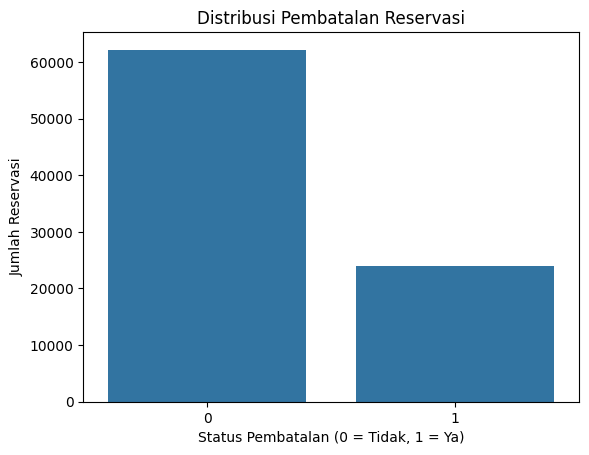

In [336]:
# Buat countplot untuk melihat jumlah reservasi dibatalkan vs tidak
sns.countplot(data=df, x='is_canceled')  
plt.title('Distribusi Pembatalan Reservasi')      # Judul plot
plt.xlabel('Status Pembatalan (0 = Tidak, 1 = Ya)')  # Label sumbu X
plt.ylabel('Jumlah Reservasi')                    # Label sumbu Y
plt.show()                                        # Tampilkan plot


In [337]:
# Hitung jumlah pembatalan (is_canceled == 1) dan total reservasi
jumlah_batal = df['is_canceled'].sum()
total_reservasi = len(df)

# Hitung persentase pembatalan
persentase_batal = jumlah_batal / total_reservasi * 100
print(f"Persentase pembatalan: {persentase_batal:.2f}%")


Persentase pembatalan: 27.84%


**Insight:**
Sekitar 28% dari total reservasi dibatalkan oleh pelanggan. Artinya, strategi untuk mengurangi pembatalan ini sangat penting agar bisnis tidak mengalami kerugian yang besar.

### **2. Visualisasi 2: Pembatalan Berdasarkan Tipe Hotel**

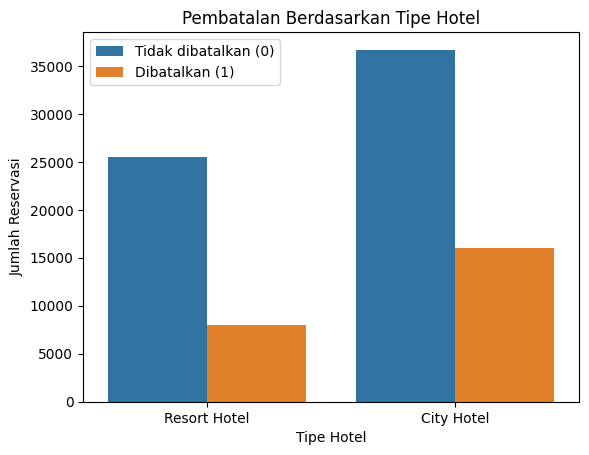

In [338]:
# Countplot dengan hue untuk membandingkan Resort vs City Hotel
# data=df -> ambil data dari dataframe
# x=hote -> hitung jumlah berdasar kategori kolom hotel
# hue=is canceled -> tiap bar dibagi warna berdasr status pembatalan 0, 1
sns.countplot(data=df, x='hotel', hue='is_canceled')  
plt.title('Pembatalan Berdasarkan Tipe Hotel')             
plt.xlabel('Tipe Hotel')                                   
plt.ylabel('Jumlah Reservasi')                             
plt.legend(labels=['Tidak dibatalkan (0)', 'Dibatalkan (1)'])      # Keterangan warna
plt.show()                                                  


**Insight:**
City Hotel punya tingkat pembatalan yang jauh lebih tinggi dibanding Resort Hotel.
Kemungkinan alasannya karena City Hotel sering digunakan oleh pelanggan bisnis yang rencana perjalanannya lebih fleksibel atau bisa berubah mendadak. Sementara itu, pelanggan Resort Hotel lebih banyak yang melakukan perjalanan liburan, yang biasanya lebih terencana dan jarang dibatalkan.

### **3. Visualisasi 3: Rata‑Rata Lead Time vs Pembatalan**

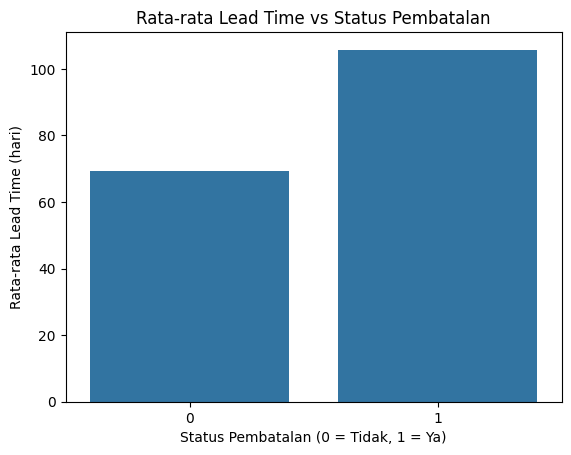

In [339]:
mean_lead = df.groupby('is_canceled')['lead_time'].mean().reset_index()

sns.barplot(data=mean_lead, x='is_canceled', y='lead_time')
plt.title('Rata-rata Lead Time vs Status Pembatalan')
plt.xlabel('Status Pembatalan (0 = Tidak, 1 = Ya)')
plt.ylabel('Rata-rata Lead Time (hari)')
plt.show()


**Insight:**
Reservasi yang dibatalkan biasanya dilakukan jauh hari sebelum tanggal kedatangan (lead time-nya lebih panjang). Artinya, semakin lama jarak antara booking dan check-in, makin besar kemungkinan pelanggan berubah pikiran. Ini masuk akal karena dalam waktu yang lama, rencana pelanggan bisa berubah, entah karena pekerjaan, kondisi keuangan, atau perubahan tujuan.

### **4. Visualisasi 4: Pengaruh Tipe Deposit terhadap Pembatalan**

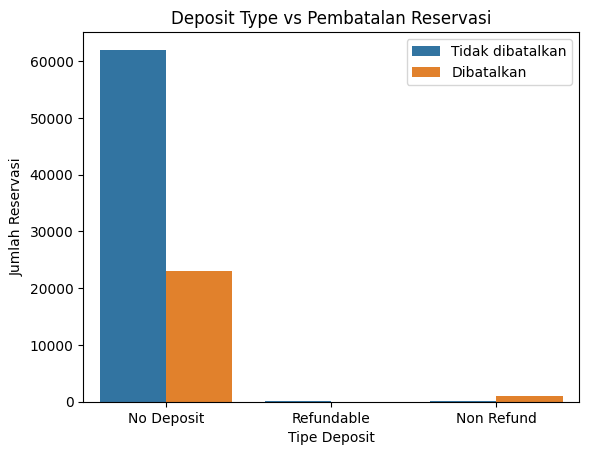

In [340]:
# Countplot untuk lihat pengaruh deposit_type pada pembatalan
sns.countplot(data=df, x='deposit_type', hue='is_canceled')  
plt.title('Deposit Type vs Pembatalan Reservasi')             
plt.xlabel('Tipe Deposit')                                   
plt.ylabel('Jumlah Reservasi')                                
plt.legend(labels=['Tidak dibatalkan', 'Dibatalkan'])        
plt.show()                                                    


**Insight:**
Sebagian besar pembatalan berasal dari pelanggan yang memilih "No Deposit". Artinya, ketika tidak ada uang yang ditaruh di awal, pelanggan cenderung lebih santai untuk membatalkan. Sebaliknya, tipe "Non Refund" nyaris tidak memiliki pembatalan. Ini bisa jadi strategi: terapkan deposit ringan untuk mengurangi pembatalan tanpa terlalu memberatkan pelanggan.

### **5. Statistik Deskriptif: Lead Time**

In [341]:
# Kelompokkan berdasarkan is_canceled lalu tampilkan deskriptif lead_time
df.groupby('is_canceled')['lead_time'].describe()  


,count,mean,std,min,25%,50%,75%,max
is_canceled,,,,,,,,
0,62154.0,69.339479,80.773652,0.0,7.0,37.0,109.0,737.0
1,23983.0,105.741775,91.905667,0.0,32.0,80.0,158.0,629.0


**Insight:**

 **Lead Time Rata-rata Lebih Panjang pada Reservasi yang Dibatalkan**

   Pelanggan yang membatalkan reservasinya memiliki waktu rata-rata 105 hari antara tanggal pemesanan dan kedatangan. Sedangkan yang tidak membatalkan hanya sekitar 69 hari.
   Artinya: Semakin jauh hari pelanggan melakukan pemesanan, makin besar kemungkinan mereka berubah pikiran atau membatalkan reservasinya.

 **Median-nya Juga Beda Jauh**

Median (nilai tengah) lead time untuk reservasi yang tidak dibatalkan adalah 37 hari, sementara yang dibatalkan 80 hari.
Ini memperkuat pola bahwa pembatalan lebih sering terjadi pada pemesanan yang dilakukan jauh-jauh hari sebelumnya.


 **Kesimpulan :**
   Pelanggan yang booking lebih awal (lead time panjang) lebih rentan membatalkan, mungkin karena lebih banyak waktu untuk berubah pikiran, rencana berubah, atau menemukan pilihan yang lebih menarik.


### **6. Statistik Inferensial**

Saya ingin menguji apakah perbedaan lead_time antara reservasi yang dibatalkan dan tidak itu signifikan secara statistik.

Hipotesis:
* H0: Tidak ada perbedaan rata-rata lead time antara yang dibatalkan dan tidak.

* H1: Ada perbedaan rata-rata lead time.

In [342]:

# Pisah data lead_time sesuai status cancel
dibatalkan     = df[df['is_canceled'] == 1]['lead_time']  
tidak_dibatalkan  = df[df['is_canceled'] == 0]['lead_time']

# Uji t-test
stat, p_value = ttest_ind(dibatalkan, tidak_dibatalkan, equal_var=False)
print(f"p-value: {p_value:.5f}")  


p-value: 0.00000


**Insight:**
Hasil uji t menunjukkan bahwa perbedaan rata-rata lead time antara reservasi yang dibatalkan dan tidak signifikan secara statistik (p-value = 0.00000). Artinya, semakin jauh jarak waktu pemesanan ke tanggal kedatangan, semakin besar kemungkinan reservasi dibatalkan. Ini menunjukkan bahwa lead time merupakan faktor penting yang dapat memengaruhi keputusan pembatalan pelanggan.

# **VI. Conclusion**

Setelah mengeksplorasi dan menganalisis data reservasi hotel, berikut adalah beberapa hal penting yang bisa kita pelajari tentang kenapa banyak pelanggan membatalkan pesanannya:

1. Sekitar 27.84% dari total reservasi di dataset mengalami pembatalan. Ini menunjukkan bahwa lebih dari seperempat pelanggan tidak jadi menginap. Tentu saja, ini bisa membuat hotel rugi karena kamar kosong dan pengelolaan jadi tidak efisien.

2. Tipe Hotel Mempengaruhi Risiko Pembatalan. Ternyata, pembatalan lebih sering terjadi di City Hotel dibandingkan Resort Hotel. Kemungkinan karena tamu di City Hotel lebih fleksibel atau sering berubah rencana, seperti orang yang bepergian untuk urusan bisnis.

3. Data menunjukkan bahwa semakin jauh jarak waktu antara tanggal pesan dan tanggal menginap (lead time), semakin besar kemungkinan pesanan dibatalkan. Ini masuk akal, karena orang cenderung berubah pikiran kalau memesan jauh-jauh hari. Uji statistik juga membuktikan bahwa perbedaan ini memang signifikan.

4. Kebanyakan pembatalan dilakukan oleh pelanggan yang tidak bayar deposit saat memesan. Artinya, kalau tidak ada uang yang ditahan di awal, pelanggan lebih bebas membatalkan tanpa rugi apa pun.

**Rekomendasi:**
Berdasarkan temuan tadi, berikut beberapa saran yang bisa membantu mengurangi pembatalan:

* Minta deposit kecil saat reservasi, supaya pelanggan lebih serius dan tidak mudah membatalkan.

* Berikan diskon atau bonus kecil untuk pelanggan yang memesan jauh-jauh hari, agar mereka lebih yakin dan tidak berubah pikiran.

* Tinjau ulang strategi pemasaran untuk City Hotel. Mungkin bisa lebih fokus ke pelanggan seperti keluarga atau wisatawan, yang biasanya sudah punya rencana tetap.

